# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Vanessa González
- Nombre de alumno 2: Benjamín Angulo


### **Link de repositorio de GitHub:** `https://github.com/BenjaminAnguloCaro/MDS7202/tree/Lab4`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1.- Apache spark es un framework especializado en el procesamiento de datos a gran escala. De este modo la principal ventaja que tiene este framework por sobre pandas es la capacidad de procesar un gran volumen de datos en tiempo real, además de que a diferencia de pandas en Apache spark se puede trabajar con data no estructurada, así como texto o imágenes. También es importante resaltar el hecho de que Apache spark es más seguro que pandas, ya que cuenta con características como la identificación, encriptación, etc.

> 2.- El RDD es la estructura de datos fundamental de Spark y se caracteriza principalmente por ser una estructura inmutable. La relación que tienen estos RDD con los dataframes es que ambos son estructuras de datos, pero en el caso de los dataframes se tiene una estructura mutable con tablas similares a las de bases de datos relacionales.

> 3.- La diferencia entre las transformaciones y acciones en Spark es que las transformaciones tienen un comportamiento "lazy" a diferencia de las acciones, es decir que las funciones que aplican las transformaciones no se ejecutan inmediatamente, sino que quedan en "cola" hasta que se ejecute una acción que desencadene la ejecución de las transformaciones. Un ejemplo de transformación podrían ser "map" o "filter" y para el caso de las acciones se tiene algunas como "reduce" o "collect". Cuando se ejecuta una acción esta optimiza la ejecución de las transformaciones que se están aplicando para garantizar una mayor eficiencia.

> 4.- El particionamiento en Spark tiene una gran importancia debido a que este es el modelo que emplea para poder realizar el procesamiento de los datos, es decir, es la base de Spark. De este modo la principal ventaja de dividir los datos en distintas particiones para así procesarlos en diferentes nodos es que de esta forma se puede lograr una ejecución más rápida de las tareas y tener una mayor capacidad de procesamiento de datos.

> 5.- El spark driver es el proceso principal de las aplicaciones de Spark. Es el que crea el objeto SparkContext en la aplicación. De este modo el spark driver tiene una función más que nada estructural. Por otro lado los spark executors son los responsables de realizar las tareas asignadas por el spark driver y de mantener los datos en la memoria.

> 6.- El catalyst optimizer es un componente de apache spark que permite la optimización de querys. Este está basado en la programación funcional de escala y fue diseñado con el propósito de añadir fácilmente nuevas técnicas de optimización y características a Spark SQL. De este modo el catalyst optmizer transforma y optimiza las querys en SQL para garantizar una ejecución más eficiente.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=46121210a2b87c6a04c1e5b8be73df88b57b5a1a4e7002979d60c1e61325754f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType
from pyspark.sql.functions import when, rand, col, sum, log, abs, month, date_format, mean

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [35]:
# Escriba su respuesta aquí
sparksession = SparkSession.builder.master("local").appName("Lab 4").getOrCreate()

df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")

)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [36]:
# Escriba su respuesta aquí

print("1.- Estructura de los datos: ")
df.printSchema() # Se revisa la estructura de los datos

print("2.- Primeras 10 filas del dataset: ")
df.show(10) # Se muestran las primeras 10 filas del dataset

print("3.- Muestreo aleatorio del 5% de los datos: ")
df.sample(fraction=0.05).show() #Se muestra parte del muestreo aleatorio

print("4.- Revisión de los tipos de datos de cada columna: ")
df.dtypes # Se muestran los tipos de datos de cada columna
# Se puede notar que la columna 'is an alien' debería ser de tipo boolean porque considera únicamente las opciones de sí o no a la pregunta de si es un alien. Además la columna 'Quantity' debería contener únicamente enteros, ya que corresponde a las unidades vendidas.

1.- Estructura de los datos: 
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

2.- Primeras 10 filas del dataset: 
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+------

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

In [37]:
df = df.withColumn("Is An Alien", col("Is An Alien").cast("boolean")) # Se cambia el tipo de la columna "is an alien" a booleano
df = df.withColumn("Quantity", col("Quantity").cast("integer")) # Se cambia el tipo de la columna "Quantity" a entero
print("5.- Se cambia el tipo de la columna problemática.")

print("6.- Cantidad de valores nulos por columna: ")
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns] #Se calcula la cantidad de valores nulos por columna
df.agg(*exprs).show()

print("7.- Se eliminan los datos con valores nulos: ")
print(f"Cantidad de datos antes de eliminar nulos: {df.count()}")
df = df.na.drop() # Se eliminan los valores nulos
print(f"Cantidad de datos después de eliminar nulos: {df.count()}")

print("8.- Se eliminan los valores duplicados: ")
print(f"Cantidad de datos antes de eliminar duplicados: {df.count()}")
df = df.dropDuplicates(["Transaction ID"]) # Se eliminan los valores duplicados de la columna "Transaction ID", ya que esta debiese tener valores únicos
print(f"Cantidad de datos después de eliminar duplicados: {df.count()}")

5.- Se cambia el tipo de la columna problemática.
6.- Cantidad de valores nulos por columna: 
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         1268

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [38]:
# Escriba su respuesta aquí

print("1.- Se agrega la columna 'Transaction bp'.")
df = df.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount")**36))) # Se crea la nueva columna para el valor de la transacción en bodoque pesos
df.show() # Se muestra el dataset con la nueva columna

print("2.- Se agrega la columna 'Transaction Month'.")
df = df.withColumn("Transaction Month", date_format("Transaction Date", "MMMM")) # Se crea la columna con el nombre del mes en que se realiza la transacción
df.show() # Se muestra el dataset con la nueva columna

print("3.- Se agrega la columna 'Type of Purchase'.")
df = df.withColumn("Type of Purchase", when(df["Quantity"] <= 5, "Compra minorista").otherwise("Compra mayorista")) # Se crea la columna que verifica si se realizó una compra mayorista o minorista
df.show() # Se muestra el dataset con la nueva columna

print("4.- Se imprimen los registros de compras mayoristas hechas por aliens.")
df.filter((df["Is An Alien"] == True) & (df["Type of Purchase"] == "Compra mayorista")).show() # Se filtra los compradores alien que tengan compras mayoristas

print("5.- Se muestra la cantidad de compras realizadas por aliens (True) y por humanos (False).")
df.groupBy("Is An Alien").count().show() # Se muestra la cantidad de compras realizadas por humanos y aliens usando .groupby()

print("6.- Se muestra una tabla con la recaudación promedio para cada método de pago, tanto para humanos como alienígenas.")
df.groupby("Payment Method").pivot("Is An Alien").mean("Transaction Amount").show()

1.- Se agrega la columna 'Transaction bp'.
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|0002948c-f473-4fd...|7ae77fa3-3e4c-479...|            131.79|2021-09-22 00:00:00|     

### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [7]:
# Escriba su respuesta aquí

# Transformación a formato pandas
df_pd = df.toPandas()

2. Visualización de variables categóricas

*   El primer gráfico permite comparar los métodos de pago utilizados por Humanos y Aliens. Allí se puede observar que en el caso de los humanos, estos tienden a hacer más pagos con tarjeta de débito y menos pagos con PayPal, mientras los pagos con tarjeta de crédito y transferencia están bastante equilibrados. \
En el caso de los aliens, estos tienden a hacer más pagos con tarjeta de débito y transferencia. \
Si bien los pagos hechos por humanos superan con creces a los pagos hechos por aliens, se pueden observar ciertas similitudes, como que en ninguno de los 2 casos existe un método de pago con una predominancia muy significativa, pues la cantidad de pagos no cambia tanto entre métodos. Otra similitud es que en ambos casos existe la pequeña tendencia a pagar con tarjeta de débito.
*   El segundo gráfico muestra la cantidad de transacciones por categoría de producto para Humanos y Aliens. En el caso de los humanos, las categorías se muestran bastante equilibradas, aunque 'electronics' y 'home & garden' muestran cantidades un poco más altas de transacciones. En el caso de los aliens, se tiene también que las categorías estan equilibradas, aunque 'electronics' y 'toys & games' tienen cantidades algo más altas de transacciones. Es decir, ambas especies gustan de los productos electrónicos por sobre otros.
*   El tercer gráfico nos indica la cantidad de transacciones por tipo de compra para humanos y aliens. Aquí se muestra una gran similitud, pues ambas especies solo hacen compras minoristas.

3. Visualización de variables numéricas

*   El primer gráfico muestra la distribución del monto de transacción para humanos y aliens. Aquí se observan claras similitudes, ya que ambas especies tienen distribuciones de mayor densidad entre 0 y 1000 USD, teniendo su peak alrededor de 200 USD.
*   El segundo gráfico muestra la distribución de edad para humanos y aliens en las transacciones. Ambas distribuciones se asemejan en que la mayor densidad se concentra entre los 20 y 50 años, no obstante, la distribución para los aliens es más suave, mientras la de los humanos tiene peaks muy notorios en ciertas edades (aprox 30 y 40 años).
*   El tercer gráfico muestra la hora de la transacción humanos y aliens. Según las distribuciones, los aliens presentan un mayor número de transacciones entre las 00:00 y 07:00 hrs aprox., luego el número de transacciones se estabiliza. En el caso de los humanos, estos tienden a aumentar sus transacciones entre las 00:00 y 04:00 hrs., para luego bajar un poco y estabilizarse. Sin embargo, presentan un gran peak de transacciones cerca de la media noche.

4. Análisis de patrones de transacciones

*   El primer gráfico obtenido es un lineplot que muestra la cantidad de transacciones por mes en cada uno de los canales. De acuerdo a ello, en todos los canales hay una baja notable en las transacciones en el mes de febrero, pero luego hay un aumento en el mes de marzo. Por otra parte, las transacciones hechas mediante una tablet presentan peaks en los meses de junio y agosto; las hechas mediante un teléfono móvil, presentan peaks en marzo y noviembre; y las hechas en un desktop tienen sus peaks en marzo y julio.
*   El segundo gráfico es de barras apiladas y muestra la cantidad de transacciones por categoría de producto en cada mes. En este gráfico se puede notar que en todos los meses la distribución de las categorías en las transacciones es similar, pues cada una de ellas representa aproximadamente un 20% de las transacciones.
*   El tercer gráfico es un gráfico de barras donde se muestra el top 3 de categorías con más transacciones para cada canal de venta. De acuerdo a lo observado, en las transacciones hechas en un desktop predominan las categorías 'electronics', 'home & garden' y 'clothing'; en las hechas por un teléfono móvil predominan 'electronics', 'toys & games' y 'health & beauty'; y en las hechas por una tablet predominan 'electronics', 'home & garden' y 'health & beauty'. Cabe señalar que entre las 3 categorías del top 3 no hay grandes diferencias en los números de transacciones.




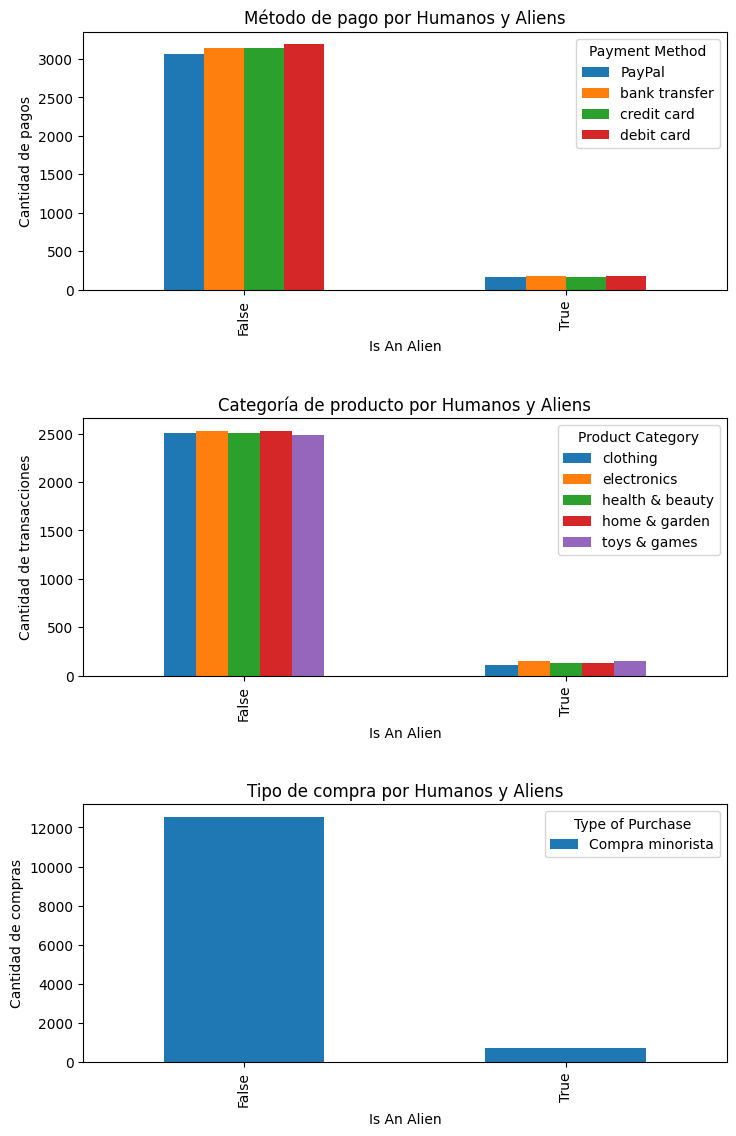

In [8]:
# Visualización de variables categóricas: se generan 3 gráficos de barras que diferencian entre humanos y aliens
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# gráfico para la variable "Payment Method"
df_pd.groupby(["Is An Alien", "Payment Method"]).size().unstack().plot(kind="bar", ax=axes[0])
axes[0].set_title("Método de pago por Humanos y Aliens")
axes[0].set_ylabel("Cantidad de pagos")

# gráfico para la variable "Product Category"
df_pd.groupby(["Is An Alien", "Product Category"]).size().unstack().plot(kind="bar", ax=axes[1])
axes[1].set_title("Categoría de producto por Humanos y Aliens")
axes[1].set_ylabel("Cantidad de transacciones")

# gráfico para la variable "Type of purchase"
df_pd.groupby(["Is An Alien", "Type of Purchase"]).size().unstack().plot(kind="bar", ax=axes[2])
axes[2].set_title("Tipo de compra por Humanos y Aliens")
axes[2].set_ylabel("Cantidad de compras")

plt.tight_layout(pad=3.0)
plt.show()

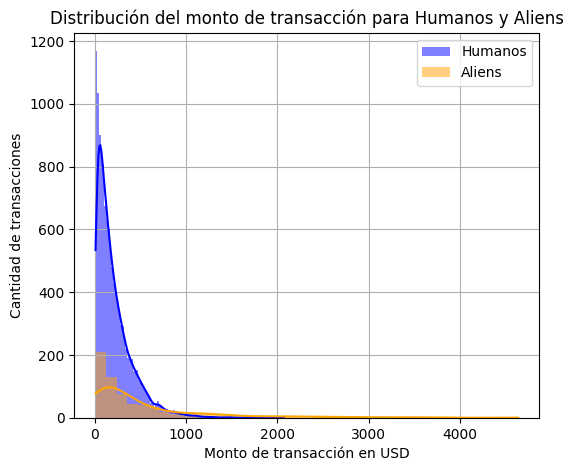

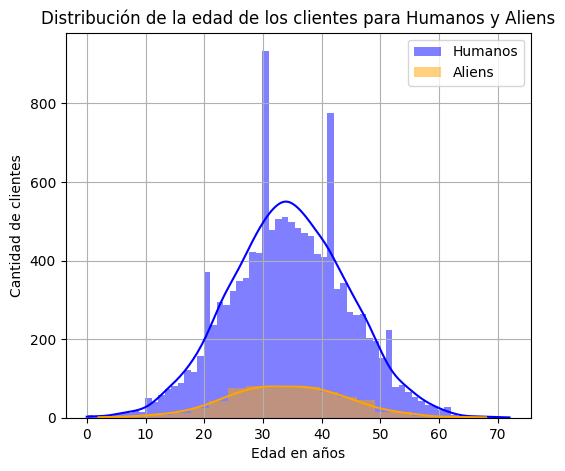

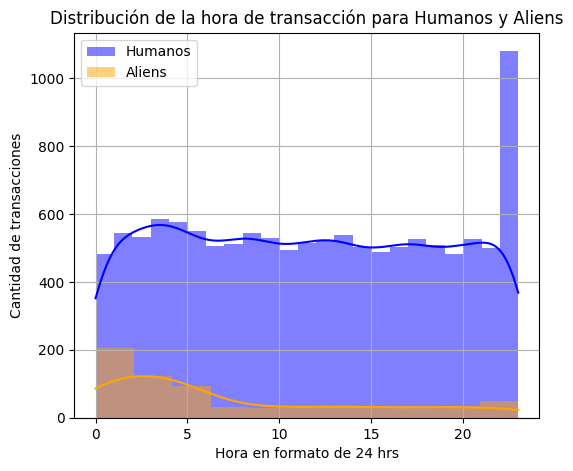

In [9]:
# Visualización de variables numéricas: se generan distplots para examinar las distribuciones de variables numéricas que diferencian entre humanos y aliens
import seaborn as sns

# creramos subconjuntos de datos para humanos y aliens
df_humanos = df_pd[df_pd["Is An Alien"] == False]
df_aliens = df_pd[df_pd["Is An Alien"] == True]

variables = ['Transaction Amount', 'Customer Age', 'Transaction Hour']
strings = [[' del monto de transacción ', 'Monto de transacción en USD', 'Cantidad de transacciones'], [' de la edad de los clientes ', 'Edad en años', 'Cantidad de clientes'],
          [' de la hora de transacción ', 'Hora en formato de 24 hrs', 'Cantidad de transacciones']]

for i in range(3):
  plt.figure(figsize=(6, 5))
  sns.histplot(df_humanos[variables[i]], kde=True, color='blue', label='Humanos', linewidth=0, alpha=0.5)
  sns.histplot(df_aliens[variables[i]], kde=True, color='orange', label='Aliens', linewidth=0, alpha=0.5)
  plt.title('Distribución' + strings[i][0] + 'para Humanos y Aliens')
  plt.xlabel(strings[i][1])
  plt.ylabel(strings[i][2])
  plt.legend()
  plt.grid()
  plt.show()

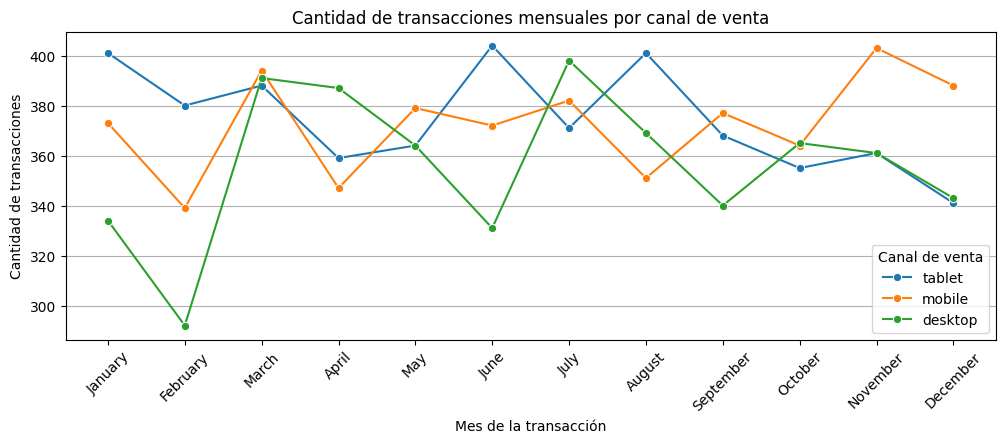

<Figure size 1000x600 with 0 Axes>

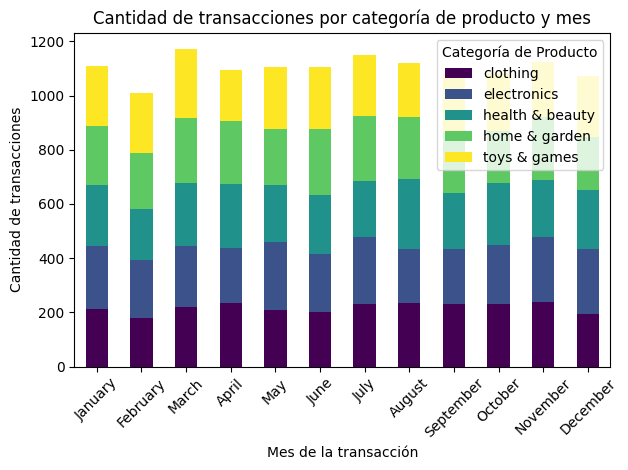

<ipython-input-10-d0bce1609be7>:36: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.barplot(data=top3, x='Device Used', y='Cantidad de Transacciones', hue='Product Category', palette=sns.color_palette("Paired"))


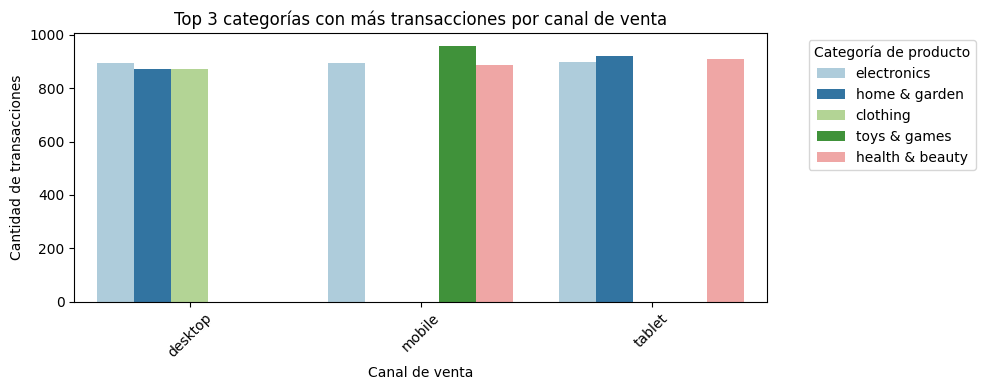

In [10]:
# 1. Hacemos un lineplot para ver la cantidad de transacciones mensuales por canal de venta
transacciones_por_canal = df_pd.groupby(['Transaction Month', 'Device Used']).size().reset_index(name='Cantidad de Transacciones') # agrupamos por mes y canal
# ordenamos por mes
transacciones_por_canal = transacciones_por_canal.sort_values(by='Transaction Month',
                          key=lambda x: x.map({mes: i for i, mes in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])}))
plt.figure(figsize=(12, 4))
sns.lineplot(data=transacciones_por_canal, x='Transaction Month', y='Cantidad de Transacciones', hue='Device Used', marker='o')
plt.title('Cantidad de transacciones mensuales por canal de venta')
plt.xlabel('Mes de la transacción')
plt.ylabel('Cantidad de transacciones')
plt.legend(title='Canal de venta')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# 2. Gráfico de barras apiladas para ver la cantidad de transacciones por categoría para cada mes
transacciones_por_categoria_mes = df_pd.groupby(['Transaction Month', 'Product Category']).size().unstack(fill_value=0)
# ordenamos por mes
transacciones_por_categoria_mes = transacciones_por_categoria_mes.sort_values(by='Transaction Month',
                          key=lambda x: x.map({mes: i for i, mes in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])}))
plt.figure(figsize=(10, 6))
transacciones_por_categoria_mes.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Cantidad de transacciones por categoría de producto y mes')
plt.xlabel('Mes de la transacción')
plt.ylabel('Cantidad de transacciones')
plt.legend(title='Categoría de Producto', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gráfico del top 3 categorías con más transacciones por canal de venta
top3 = df_pd.groupby(['Device Used', 'Product Category']).size().reset_index(name='Cantidad de Transacciones')
top3 = top3.sort_values(by=['Device Used', 'Cantidad de Transacciones'], ascending=[True, False])
top3 = top3.groupby('Device Used').head(3)
plt.figure(figsize=(10, 4))
sns.barplot(data=top3, x='Device Used', y='Cantidad de Transacciones', hue='Product Category', palette=sns.color_palette("Paired"))
plt.title('Top 3 categorías con más transacciones por canal de venta')
plt.xlabel('Canal de venta')
plt.ylabel('Cantidad de transacciones')
plt.legend(title='Categoría de producto', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



1. Considerando que una buena variable para particionar es una que suele usarse en filtros o consultas y además tiene una distribución relativamente uniforme, se decide utilizar 'Product Category'. Esta variable se usa mucho en consultas (como en el EDA) porque es de gran interés, y se observó que su distribución general es uniforme (gráfico de barras apiladas con transacciones por categoría en cada mes).

In [11]:
# Código Aquí

# reemplazamos los espacios por "_" en los nombres de las columnas para no tener problemas al hacer consultas
df2 = df.select("*")
for col_name in df2.columns:
  df2 = df2.withColumnRenamed(col_name, col_name.replace(" ", "_"))
df2.show(3)

# 1. Creación de tabla
df2.write.partitionBy('Product_Category').saveAsTable(name='tabla')

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction_ID|         Customer_ID|Transaction_Amount|   Transaction_Date|Payment_Method|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|     IP_Address|    Shipping_Address|     Billing_Address|Is_An_Alien|Account_Age_Days|Transaction_Hour|    Transaction_bp|Transaction_Month|Type_of_Purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|0002948c-f473-4fd...|7ae

In [12]:
# 2. 10 clientes que más productos han comprado
sparksession.sql("""
SELECT Customer_ID, SUM(Quantity) AS Total_productos_comprados
FROM tabla
GROUP BY Customer_ID
ORDER BY Total_productos_comprados DESC
LIMIT 10;
""").show()

+--------------------+-------------------------+
|         Customer_ID|Total_productos_comprados|
+--------------------+-------------------------+
|447b6447-464c-400...|                        5|
|6a6e91d8-d630-466...|                        5|
|1718476e-0518-41b...|                        5|
|a76f00f5-8493-41b...|                        5|
|62b1ce0c-5495-43e...|                        5|
|2e835dd8-6c9c-4c8...|                        5|
|866e29ec-dd8e-4a1...|                        5|
|6300f942-b86d-433...|                        5|
|2f3d5b31-bd85-4d7...|                        5|
|6def79d9-fb71-415...|                        5|
+--------------------+-------------------------+



In [13]:
# 3. función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses
sparksession.sql("""
SELECT Customer_ID, Transaction_Amount
FROM (
    SELECT
        Customer_ID, Transaction_Amount,
        ROW_NUMBER() OVER (
            PARTITION BY Customer_ID
            ORDER BY Transaction_Date DESC
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS row_num
    FROM tabla
    WHERE Transaction_Date >= DATEADD(MONTH, -3, CURRENT_DATE)
) subquery
WHERE row_num = 1;
""").show()

+--------------------+------------------+
|         Customer_ID|Transaction_Amount|
+--------------------+------------------+
|0010bfa7-d3b5-442...|            130.74|
|004d6df5-5d37-4cd...|             32.36|
|0061c7c7-ffd9-40d...|            255.97|
|0084aeb6-6bc7-4f8...|            265.09|
|00dba4f3-102b-4d8...|             80.76|
|00dcef31-265c-4d3...|             82.57|
|011ba8d6-6dcd-4cf...|            218.64|
|014817a0-2f4f-477...|            289.72|
|014da57c-a59c-465...|             33.22|
|015a8996-8ac2-488...|            451.94|
|01754c8a-c873-49e...|            267.89|
|0178fe5b-e055-4ec...|            723.04|
|01ac1427-4acc-410...|            234.43|
|01feca2f-2907-445...|             48.71|
|0270d1d5-c8b8-4be...|              56.2|
|03557036-602b-4f5...|              29.8|
|03a5dccc-c7cc-4aa...|             58.84|
|03c61a84-77db-4aa...|            269.66|
|03d7aba5-8f52-40f...|             93.03|
|03f31ca3-a6ec-424...|             22.09|
+--------------------+------------

### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

1.- El objeto es de tipo pickle, y dado que se busca predecir la probabilidad de fraude utilizándolo, se deduce que es un modelo de predicción o clasificación.

2.- El método que predice la probabilidad es predict_proba.

5.- En primer lugar, las UDF permiten realizar operaciones específicas en un entorno distribuido, es decir, se ejecutan de manera distribuida en un clúster de Spark. Esto quiere decir que podemos aplicar la función a un conjunto grande de datos de manera paralela, lo que hace más eficiente el procesamiento. Además, permiten realizar tareas complejas que no están disponibles en Spark SQL de forma nativa, sin la necesidad de escribir consultas muy extensas de SQL.

In [123]:
# Código Aquí
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import pickle

print("1.- Se carga el objeto serializado:")
with open('object.pkl', 'rb') as f: # Se carga el objeto .pkl
    objeto = pickle.load(f)

print("2.- Se explora el objeto") # Se usan las funciones dir y help para explorar el objeto
print(dir(objeto))
help(objeto)

print("3.- Se crea la función personalizada")
def predecir_fraude(transaction_amount, quantity, customer_age, transaction_hour):
  entrada = [[transaction_amount, quantity, customer_age, transaction_hour]]
  prob_fraude = objeto.predict_proba(entrada)[0][1]
  return prob_fraude

print("4.- Función UDF")
udf_function = udf(predecir_fraude, FloatType())

print("5.- Se genera la columna prediction")
df = df.withColumn("Prediction", udf_function(
    df["Transaction Amount"],
    df["Quantity"],
    df["Customer Age"],
    df["Transaction Hour"]
))

df.printSchema()

1.- Se carga el objeto serializado:
2.- Se explora el objeto
['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_pr